### Normalitás vizsgálat

Kapcsolódó melléklet: 4. sz melléklet, részletes elemzések

Fontosabb könyvtárak betöltése

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, normaltest, kstest, probplot

In [30]:
df = pd.read_excel("HDI_jo.xlsx")

In [31]:
df

,County,HDI,HDI_modified,HDI_weighted,BMI_mean
0,Vas,0.930258,0.828275,0.863043,28.58
1,Szabolcs-Szatmár-Bereg,0.811876,0.576437,0.597672,30.41
2,Zala,0.820084,0.774539,0.783497,30.50
3,Veszprém,0.868295,0.751246,0.786627,31.66
4,Csongrád-Csanád,0.880785,0.750642,0.775335,21.69
5,Bács-Kiskun,0.894190,0.759333,0.779526,22.83
6,Nógrád,0.813489,0.501370,0.566693,36.67
7,Borsod-Abaúj-Zemplén,0.832700,0.571982,0.637282,21.89
8,Heves,0.835444,0.686818,0.722005,27.33
9,Hajdú-Bihar,0.817093,0.673574,0.695380,29.93


#### Normalitás tesztek

In [32]:
for column in hdi_columns:
    print(f"\n{column} típusa: {df[column].dtype}")
    print(df[column].head())  # első néhány érték


HDI típusa: float64
0    0.930258
1    0.811876
2    0.820084
3    0.868295
4    0.880785
Name: HDI, dtype: float64

HDI_modified típusa: float64
0    0.828275
1    0.576437
2    0.774539
3    0.751246
4    0.750642
Name: HDI_modified, dtype: float64

HDI_weighted típusa: float64
0    0.863043
1    0.597672
2    0.783497
3    0.786627
4    0.775335
Name: HDI_weighted, dtype: float64


Normalitás tesztek a HDI változóra:
  Shapiro-Wilk teszt: statisztika = 0.9790, p-érték = 0.9200
  D'Agostino-Pearson teszt: statisztika = 0.2073, p-érték = 0.9015
  Kolmogorov-Smirnov teszt: statisztika = 0.1339, p-érték = 0.8202


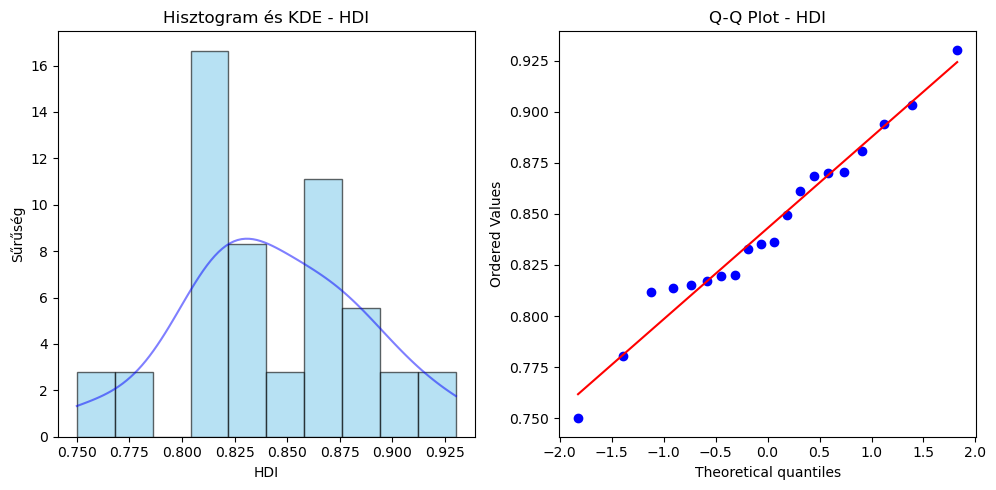

Normalitás tesztek a HDI_modified változóra:
  Shapiro-Wilk teszt: statisztika = 0.9818, p-érték = 0.9554
  D'Agostino-Pearson teszt: statisztika = 0.5325, p-érték = 0.7662
  Kolmogorov-Smirnov teszt: statisztika = 0.1135, p-érték = 0.9335


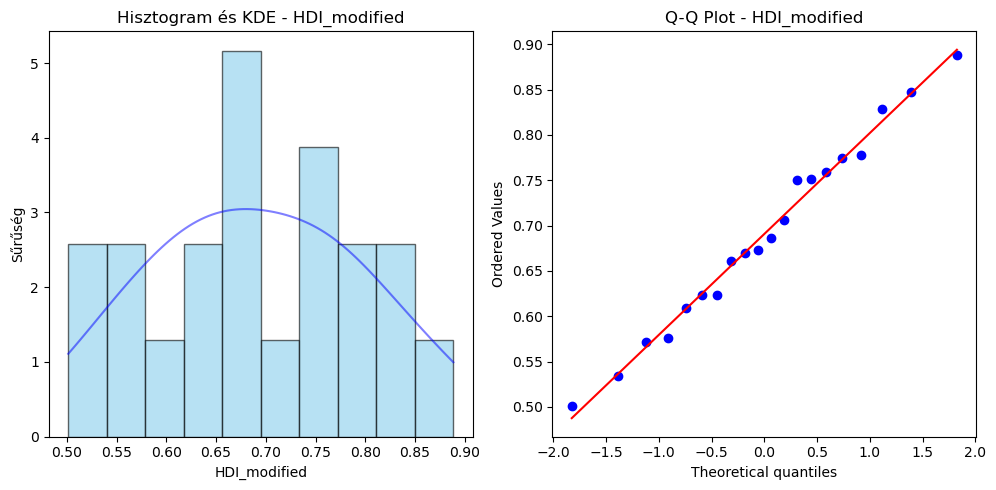

Normalitás tesztek a HDI_weighted változóra:
  Shapiro-Wilk teszt: statisztika = 0.9608, p-érték = 0.5596
  D'Agostino-Pearson teszt: statisztika = 1.1213, p-érték = 0.5708
  Kolmogorov-Smirnov teszt: statisztika = 0.1094, p-érték = 0.9493


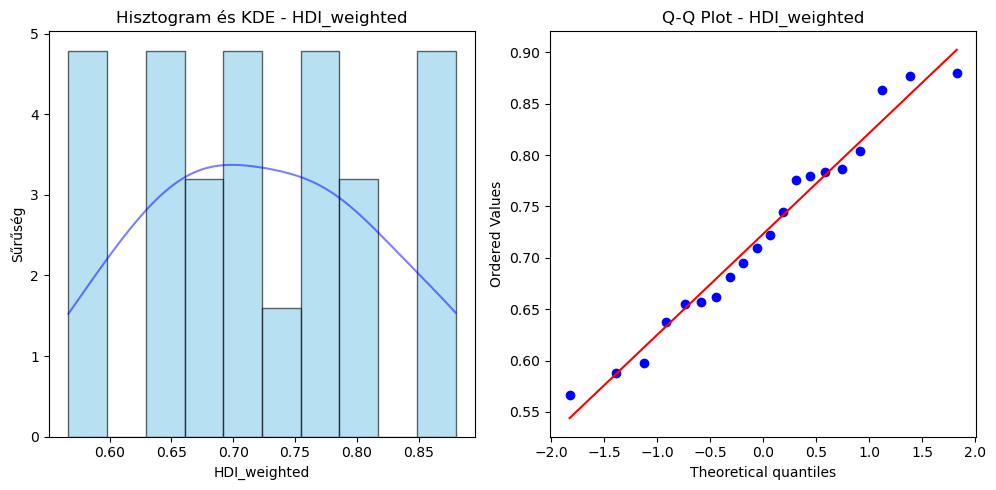

In [33]:


# Definiáljuk a HDI oszlopokat
hdi_columns = ['HDI', 'HDI_modified', 'HDI_weighted']

# Iterálás minden HDI változóra
for column in hdi_columns:
    print(f"Normalitás tesztek a {column} változóra:")
    data_column = df[column].dropna()  # Hiányzó értékek eltávolítása

    # Shapiro-Wilk teszt
    shapiro_stat, shapiro_p = shapiro(data_column)
    print(f"  Shapiro-Wilk teszt: statisztika = {shapiro_stat:.4f}, p-érték = {shapiro_p:.4f}")

    # D'Agostino-Pearson teszt
    dagostino_stat, dagostino_p = normaltest(data_column)
    print(f"  D'Agostino-Pearson teszt: statisztika = {dagostino_stat:.4f}, p-érték = {dagostino_p:.4f}")

    # Kolmogorov-Smirnov teszt
    ks_stat, ks_p = kstest(data_column, 'norm', args=(data_column.mean(), data_column.std()))
    print(f"  Kolmogorov-Smirnov teszt: statisztika = {ks_stat:.4f}, p-érték = {ks_p:.4f}")

   #Ábrázolás
    plt.figure(figsize=(10, 5))

    # 1. subplot: Hisztogram + KDE
    plt.subplot(1, 2, 1)
    plt.hist(data_column, bins=10, color="skyblue", edgecolor='black', alpha=0.6, density=True)

    # KDE görbe külön
    kde = gaussian_kde(data_column)
    x_vals = np.linspace(data_column.min(), data_column.max(), 100)
    plt.plot(x_vals, kde(x_vals), color="blue", alpha=0.5)

    plt.title(f"Hisztogram és KDE - {column}")
    plt.xlabel(column)
    plt.ylabel("Sűrűség")

    # 2. subplot: Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(data_column, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - {column}")

    plt.tight_layout()
    plt.show()


    